<a href="https://colab.research.google.com/github/danielahernandz/Series-de-tiempo-avanzado/blob/main/Serie_temperaturas_Visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

Visualizando: Patrones en series de tiempo


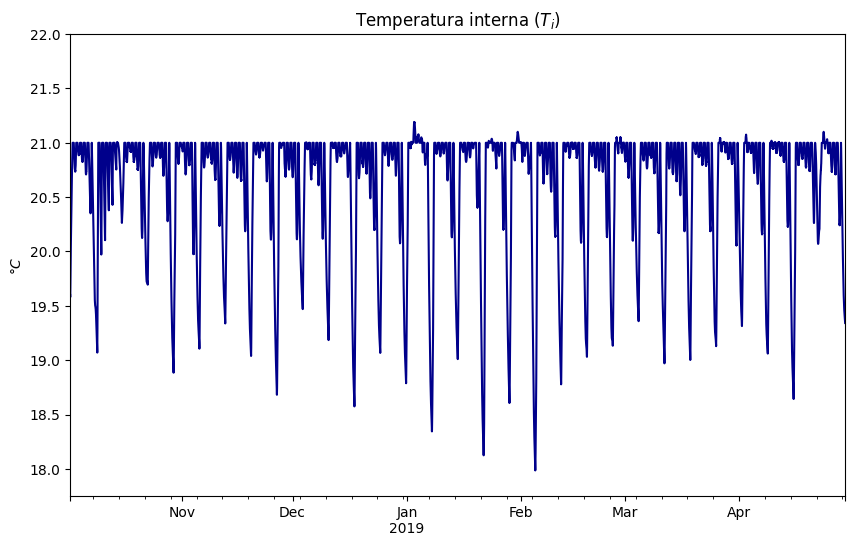

In [19]:
df = pd.read_csv("Ti_data.csv", index_col=0, parse_dates= True)
df #temperatura interna de edificio recogida cada 30min
df.Ti = df.Ti.fillna(value= df.Ti.mean())

fig, ax = plt.subplots(1, 1, figsize=(10,6))

df.plot(ax=ax, color="darkblue", legend=None)
ax.set_ylim(17.75, 22)
ax.set_ylabel('$°C$')
ax.set_title('Temperatura interna $(T_i) $');

Patrones: diurnos/nocturnos - anuales/semanales

Diurnos 

In [20]:
# Separación día y hora
df['date'] = df.index.normalize() #me crea la columna date ya no solo como index
df['time'] = df.index.time.astype(str)
df

,Ti,date,time
2018-10-01 18:00:00,19.600,2018-10-01,18:00:00
2018-10-01 18:30:00,19.580,2018-10-01,18:30:00
2018-10-01 19:00:00,19.610,2018-10-01,19:00:00
2018-10-01 19:30:00,19.671,2018-10-01,19:30:00
2018-10-01 20:00:00,19.749,2018-10-01,20:00:00
...,...,...,...
2019-04-29 15:30:00,19.380,2019-04-29,15:30:00
2019-04-29 16:00:00,19.370,2019-04-29,16:00:00
2019-04-29 16:30:00,19.361,2019-04-29,16:30:00
2019-04-29 17:00:00,19.352,2019-04-29,17:00:00


In [26]:
#Transformando dataframe #index:fecha, columnas: cada valor de time de 30min en 30min
#Cada columna ahora es una serie temporal, var con index fecha 
data = df.pivot(index='date', columns= 'time', values='Ti')
data

time,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,04:30:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
date,,,,,,,,,,,,,,,,,,,,,
2018-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.610,19.671,19.749,19.810,19.878,19.936,19.994,20.050,20.101,20.154
2018-10-02,20.201,20.251,20.298,20.345,20.393,20.437,20.485,20.528,20.574,20.616,...,20.933,20.909,20.892,20.872,20.854,20.839,20.819,20.809,20.790,20.783
2018-10-03,20.767,20.759,20.754,20.753,20.743,20.748,20.734,20.742,20.739,20.756,...,20.967,20.957,20.947,20.939,20.931,20.924,20.915,20.910,20.902,20.898
2018-10-04,20.892,20.888,20.887,20.885,20.885,20.886,20.886,20.890,20.889,20.897,...,20.958,20.944,20.927,20.915,20.897,20.886,20.869,20.860,20.847,20.840
2018-10-05,20.832,20.827,20.826,20.826,20.825,20.830,20.827,20.838,20.834,20.849,...,20.942,20.913,20.882,20.855,20.827,20.804,20.780,20.763,20.743,20.733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,20.989,20.982,20.965,20.957,20.943,20.938,20.926,20.924,20.913,20.915,...,20.946,20.927,20.907,20.889,20.869,20.852,20.835,20.818,20.808,20.791
2019-04-26,20.785,20.776,20.756,20.751,20.736,20.737,20.731,20.739,20.743,20.760,...,20.936,20.912,20.886,20.865,20.840,20.823,20.800,20.787,20.768,20.759
2019-04-27,20.744,20.741,20.724,20.726,20.712,20.719,20.709,20.722,20.719,20.739,...,20.931,20.896,20.858,20.819,20.778,20.736,20.694,20.653,20.611,20.570


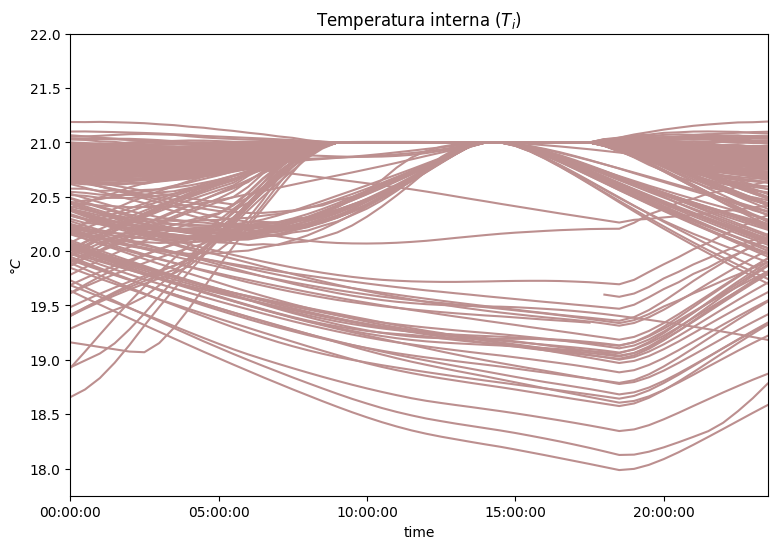

In [37]:
#Plot
fig, ax = plt.subplots(1, 1, figsize=(9,6))
data.T.plot(ax=ax, color="rosybrown", legend=False)
ax.set_xlim(0, 47) #desde donde inician y terminan mis datos
ax.set_ylim(17.75, 22) #desde donde inicia valor Y y termina
ax.set_ylabel('$°C$')
ax.set_title('Temperatura interna $(T_i) $');

#Cada linea se corresponde a un día completo

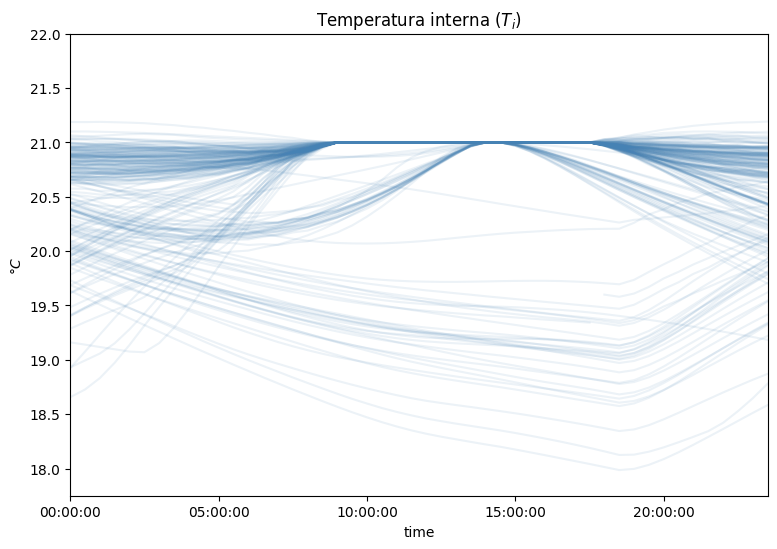

In [38]:
#Transparencia: Apha que las lineas individuales se han visibles
#Plot con transpariencia
fig, ax = plt.subplots(1, 1, figsize=(9,6))
data.T.plot(ax=ax, color="steelblue", alpha=0.1 , legend=False) #Nivel de transparencia alpha
ax.set_xlim(0, 47) #desde donde inician y terminan mis datos
ax.set_ylim(17.75, 22) #desde donde inicia valor Y y termina
ax.set_ylabel('$°C$')
ax.set_title('Temperatura interna $(T_i) $');

#Se observa que apartir de las 18h en un cierto grupo de días aumenta la temperatura se puede deber a prender la calefacción

Cambiando horario de comienzo

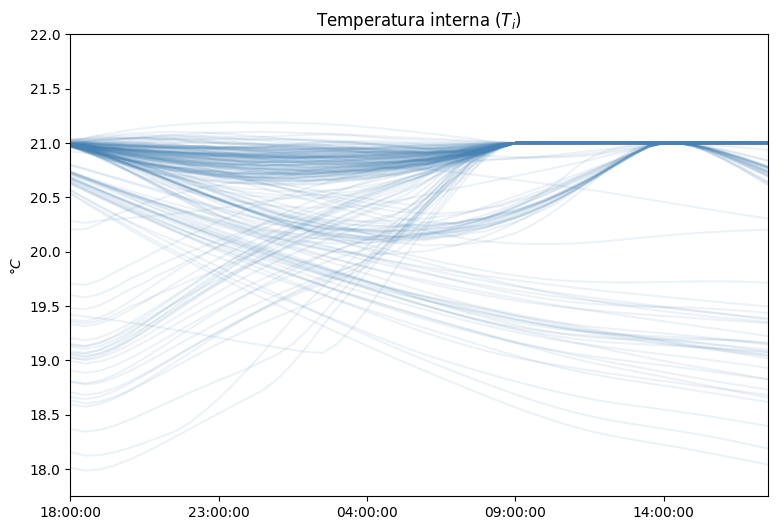

In [40]:
#Sabemos que a las 18horas inicia la medicion del dataset, queremos pasar de las 00 a las 18h
#18 horas son 36 medias horas mover 36 periodos para llegar a las 18
df_roll= pd.DataFrame(index=data.index,
                        columns=np.roll(data.columns, -36),
                      data=np.roll(data.values, -36))

#plot
fig, ax = plt.subplots(1, 1, figsize=(9,6))
df_roll.T.plot(ax=ax, color="steelblue", alpha=0.1 , legend=False) 
ax.set_xlim(0, 47) 
ax.set_ylim(17.75, 22)
ax.set_ylabel('$°C$')
ax.set_title('Temperatura interna $(T_i) $');

## Visualizando patrones diernos y semanales

Ahora debemos categorizar a que días y semanas corresponden

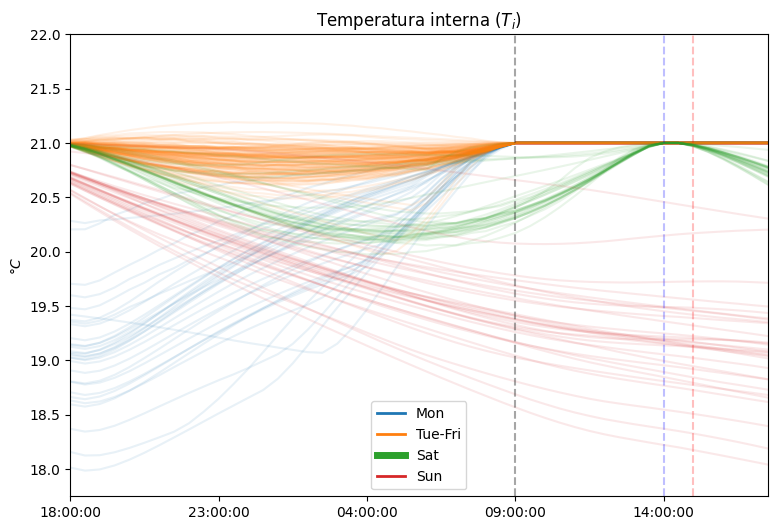

In [58]:
#Diferenciando por color
day_colors = {'Monday': 'C0',
              'Tuesday' : 'C1',
              'Wednesday': 'C1',
              'Thursday': 'C1',
              'Friday': 'C1',
              'Saturday': 'C2',
              'Sunday': 'C3' }

#Plot
fig, ax = plt.subplots(1, 1, figsize=(9,6))
#index.name() pandas agrega a la fecha el dia correspondiente que marca la fecha del index
for day_name, color in day_colors.items():
  #Nota: Se esta dibujando dataframe transpuesto
  df_roll[df_roll.index.day_name() == day_name].T.plot(
      ax=ax, color=color, alpha=0.1, legend=None)

ax.set_xlim(0, 47) 
ax.set_ylim(17.75, 22)

#Lineas verticales defiiendo los horarios de calefacción
ax.axvline(30, alpha=0.35, color="black", linestyle='--') #15 horas de diferencia como corre de 30 en 30min son 30 periodos de 30 min para llegar al punto donde la temperatura se nivela calientita
ax.axvline(40, alpha=0.25, color="blue", linestyle='--')
ax.axvline(42, alpha=0.25, color="red", linestyle='--')

ax.set_ylabel('$°C$')
ax.set_title('Temperatura interna $(T_i) $');

#Leyenda: #line2d que muestra el color se define anchor y color
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='C0', lw=2),
                Line2D([0], [0], color='C1', lw=2),
                Line2D([0], [0], color='C2', lw=5),
                Line2D([0], [0], color='C3', lw=2),]

ax.legend(custom_lines, ['Mon', 'Tue-Fri', 'Sat', 'Sun']);


In [49]:
df1 = df_roll.index.day_name() 
df1

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       ...
       'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'Monday'],
      dtype='object', name='date', length=211)